
https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency

# Bitcoin Price Predictor

# Background

1.) bitcoin and gold are sort of like alternative forms of currency when people are afraid of the dollar being worth less...2.) TSLA and Cyptocurrencies both represent an investement in technology and the future of it, ie electric cars, and batteris ect. 2.) Ethereum is one of the top used other forms of crypto currency and that if bitcoin goes up then other people are adopting the idea decentralized money.

<b> We want to see whether gold, Tesla stock price, ETH price, or a combination of the three best predict BTC price. </b>

# Hypothesis

We predict that TSLA and ETH best predict BTC price.

# Analysis

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re


import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt

import datetime
import sys
import scipy

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table # confidence intervall
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
from IPython.display import Image

### Read in Datasets

In [71]:
#Bitcoin and Altcoin Data all from the same Data Set
coin_Aave = pd.read_csv('coin_Aave.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_Bitcoin = pd.read_csv('coin_Bitcoin.csv')
coin_Cardano = pd.read_csv('coin_Cardano.csv')
coin_ChainLink = pd.read_csv('coin_ChainLink.csv')
coin_Cosmos = pd.read_csv('coin_Cosmos.csv')
coin_CryptocomCoin = pd.read_csv('coin_CryptocomCoin.csv')
coin_Dogecoin = pd.read_csv('coin_Dogecoin.csv')
coin_EOS = pd.read_csv('coin_EOS.csv')
coin_Ethereum = pd.read_csv('coin_Ethereum.csv')
coin_Iota = pd.read_csv('coin_Iota.csv')
coin_Litecoin = pd.read_csv('coin_Litecoin.csv')
coin_Monero = pd.read_csv('coin_Monero.csv')
coin_NEM = pd.read_csv('coin_NEM.csv')
coin_Polkadot = pd.read_csv('coin_Polkadot.csv')
coin_Solana = pd.read_csv('coin_Solana.csv')
coin_Stellar = pd.read_csv('coin_Stellar.csv')
coin_Tether = pd.read_csv('coin_Tether.csv')
coin_Tron = pd.read_csv('coin_Tron.csv')
coin_Uniswap = pd.read_csv('coin_Uniswap.csv')
coin_WrappedBitcoin = pd.read_csv('coin_WrappedBitcoin.csv')
coin_USDCoin = pd.read_csv('coin_USDCoin.csv')
coin_XRP = pd.read_csv('coin_XRP.csv')

#This is a seperate Alt coin,
coin_drgn = pd.read_csv('price_drgn.csv')

#This is Monthly Gold Prices
gold = pd.read_csv('monthly_gold_prices.csv')

# Tesla Stock 
tsla = pd.read_csv("TSLA.csv")
tsla_2020 = pd.read_csv('TSLA-2020.csv')

### Explore the Data

In [72]:
# From the big dataset of altcoins and bitcoin prices
coin_Bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [73]:
coin_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [74]:
gold.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [75]:
# Check to see if the shapes match
np.shape(coin_Bitcoin)

(2862, 10)

In [76]:
np.shape(coin_Ethereum)

(2031, 10)

In [77]:
np.shape(gold)

(847, 2)

#### They dont match so we have to what dates we can have start and end that both datasets cover

In [78]:
# What date did the bitcoin data begin? What date did the bitcoin data end?
print("Start : " + str(coin_Bitcoin['Date'][0]))
print ("End : " + str(coin_Bitcoin['Date'][len(coin_Bitcoin)-2:-1]))

Start : 2013-04-29 23:59:59
End : 2860    2021-02-26 23:59:59
Name: Date, dtype: object


In [79]:
# What date did the ethereum data start? When does it End?
print("Start : " + str(coin_Ethereum['Date'][0]))
print ("End : " + str(coin_Ethereum['Date'][len(coin_Ethereum)-2:-1]))

Start : 2015-08-08 23:59:59
End : 2029    2021-02-26 23:59:59
Name: Date, dtype: object


#### Find the index of start and end that fits Ethereum Data

In [80]:
# # This is the code WORKED, and helped to find the index of the start and end date that fall on the same data as Ethereum 

# # So, now we need to make Ethereum and Bitcoin Data sets start and end on the same day. 
# # Since ethereum start later we need to find the index of then the bitcoin start on that day and cut the dataset down. 
# coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2015-08-08 23:59:59']
# coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2021-02-18 23:59:59']
# # Okay, so the index is 831, ad the end is 2852 lets cut to down to fit.

# BITCOIN

In [81]:
coin_Bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [82]:
start_index = 831
end_index = 2852

#This creates a new dataframs of just the date and closing price of bitcoin
coin_Bitcoin_Update = coin_Bitcoin[['Date','Close']].copy()
# This matches the start and end dates of the ethereum data set
coin_Bitcoin_Update = coin_Bitcoin_Update[start_index:end_index]

coin_Bitcoin_Update

,Date,Close
831,2015-08-08 23:59:59,260.997009
832,2015-08-09 23:59:59,265.083008
833,2015-08-10 23:59:59,264.470001
834,2015-08-11 23:59:59,270.385986
835,2015-08-12 23:59:59,266.376007
...,...,...
2847,2021-02-13 23:59:59,47105.517473
2848,2021-02-14 23:59:59,48717.290211
2849,2021-02-15 23:59:59,47945.056832
2850,2021-02-16 23:59:59,49199.871344


In [83]:
# Here we are updatting the "Date" column data to be datetime
coin_Bitcoin_Update.set_index('Date', inplace=True)

# Then set the index to the data
coin_Bitcoin_Update.index = pd.to_datetime(coin_Bitcoin_Update.index)

# Make sure its sorted
coin_Bitcoin_Update.sort_index()

# This will take the mean of the data within one month and set it
coin_Bitcoin_Update = coin_Bitcoin_Update.resample('1M').mean()
coin_Bitcoin_Update

# Indexing Bitcoin dataset
    # matbe move this one up to where the dataset for bitcoin is
coin_Bitcoin_Update= coin_Bitcoin_Update[:60]

# Resetting the index
coin_Bitcoin_Update.reset_index(inplace= True)
coin_Bitcoin_Update.shape
coin_Bitcoin_Update

,Date,Close
0,2015-08-31,241.751832
1,2015-09-30,233.595533
2,2015-10-31,264.855356
3,2015-11-30,348.883332
4,2015-12-31,424.464547
5,2016-01-31,410.844485
6,2016-02-29,404.408274
7,2016-03-31,416.525774
8,2016-04-30,434.339398
9,2016-05-31,461.954415


# ETHEREUM

In [84]:
coin_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [85]:
## Reorganizing the datatset
coin_Ethereum_Update = coin_Ethereum[['Date','Close']].copy()

# Here we are updatting the "Date" column data to be datetime
coin_Ethereum_Update.set_index('Date', inplace=True)

# Then set the index to the dat
coin_Ethereum_Update.index = pd.to_datetime(coin_Ethereum_Update.index)

# Make sure its sorted
coin_Ethereum_Update.sort_index()

# This will take the mean of the data within one month and set it
coin_Ethereum_Update = coin_Ethereum_Update.resample('1M').mean()
coin_Ethereum_Update.reset_index(inplace= True)

#Indexing the data set
coin_Ethereum_Update= coin_Ethereum_Update[:60]

coin_Ethereum_Update[:3]

,Date,Close
0,2015-08-31,1.259649
1,2015-09-30,0.988966
2,2015-10-31,0.661104


#### The datasets FIT!!!
Awesome, so now the ethereum and bitcon data start and end at the same time, and have the same number of row data because we took the mean of the month data. That way even if there are missing day values that have been average out in the month value. 

In [86]:
np.shape(coin_Ethereum_Update)

(60, 2)

In [87]:
np.shape(coin_Bitcoin_Update)

(60, 2)

In [88]:
def train_linear(X, Y):
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)
    
    return clf

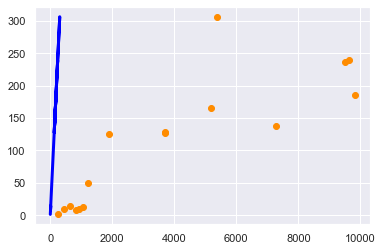

In [89]:
#This code was taken directly from 
# https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency/blob/master/Models/linear_regression.py

msk = np.random.rand(len(coin_Bitcoin_Update)) < 0.8

X = coin_Bitcoin_Update["Close"]
Y = coin_Ethereum_Update["Close"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = train_linear(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

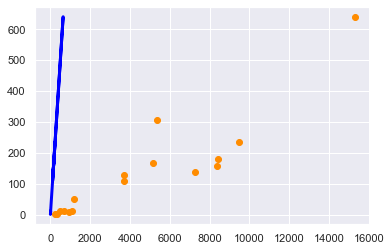

In [90]:

msk = np.random.rand(len(coin_Bitcoin_Update)) < 0.7

X = coin_Bitcoin_Update["Close"]
Y = coin_Ethereum_Update["Close"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = train_linear(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

# GOLD

### Gold Price Prediction
https://github.com/pitagorinaunuka/Gold-Price-Prediction

If we wanted to look at gold versus bitcoin, I need to first fit the data together. The date for gold started in the year 1950, and is monthly data. So we need to make the dates based on months for bitcoin, and then only look at the gold prices during the same years as bitcoin. 

In [91]:
# Gold Price History 
gold.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [92]:
## Reorganizing the dataset
gold_update = gold[['Date','Price']].copy()

# Here we are updatting the "Date" column data to be datetime
gold_update.set_index('Date', inplace=True)

# Then set the index to the dat
gold_update.index = pd.to_datetime(gold_update.index)

# Make sure its sorted
gold_update.sort_index()

# This will take the mean of the data within one month and set it
gold_update = gold_update.resample('1M').mean()

# Indexing the dataset
gold_update= gold_update[787:847]

# Resetting the index
gold_update.reset_index(inplace= True)
gold_update.head()

,Date,Price
0,2015-08-31,1117.525
1,2015-09-30,1124.905
2,2015-10-31,1157.123
3,2015-11-30,1088.388
4,2015-12-31,1068.317


## TESLA

In [93]:
# Here we are updatting the "Date" column data to be datetime
tsla.set_index('Date', inplace=True)

# Then set the index to the data
tsla.index = pd.to_datetime(tsla.index)

# Make sure its sorted
tsla = tsla.sort_index()

# This will take the mean of the data within one month and set it
tsla = tsla.resample('1M').mean()

# Indexing TSLA dataset
tsla = tsla[62:122]

# Resetting the index
tsla.reset_index(inplace=True)

TSLA currently only contains observation from Aug. 2015 - Feb. 2020. We need to add in observations up to July 2020 to match with the rest of the datasets.

In [94]:
# Creating data set of second TSLA set
# Here we are updatting the "Date" column data to be datetime
tsla_2020.set_index('Date', inplace=True)

# Then set the index to the data
tsla_2020.index = pd.to_datetime(tsla_2020.index)

# Make sure it's sorted
tsla_2020 = tsla_2020.sort_index()

# This will take the mean of the data within one month and set it
tsla_2020 = tsla_2020.resample('1M').mean()

# Indexing TSLA dataset
tsla_2020 = tsla_2020[:5]

# Resetting the index
tsla_2020.reset_index(inplace=True)


In [95]:
# Combining the two datsets together
tsla = pd.concat([tsla, tsla_2020], ignore_index = True) 
tsla.shape

(60, 7)

# MODEL 1: GOLD and BITCOIN (BTC = m*GOLD + b)

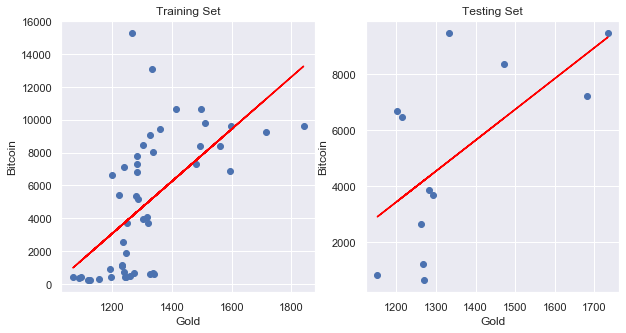

In [96]:
#Split the data
gold_train, gold_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 15)
# default qay to split
#gold_train = gold_update['Price'][:48]
#gold_test= gold_update['Price'][48:]
#Bitcoin_train= coin_Bitcoin_Update['Close'][:48]
#Bitcoin_test = coin_Bitcoin_Update['Close'][48:]

# Plot the data
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (10, 5))


# Plot the data
ax1.plot(gold_train, coin_Bitcoin_Update_train, 'o')
ax2.plot(gold_test, coin_Bitcoin_Update_test, 'o')

# Plot the regression line
m, b= np.polyfit(gold_train, coin_Bitcoin_Update_train, 1)
m2, b2= np.polyfit(gold_test, coin_Bitcoin_Update_test, 1)

ax1.plot(gold_train, m*(gold_train) + b, color= 'red')
ax2.plot(gold_test, m2*(gold_test) + b2, color= 'red')

#Calculate RMSEs.
M1_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, m*(gold_train) + b))
M1_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, m2*(gold_test) + b2))


# Labeling the graph
ax1.set_xlabel('Gold')
ax1.set_ylabel('Bitcoin')
ax1.set_title('Training Set')
ax2.set_xlabel('Gold')
ax2.set_ylabel('Bitcoin')
ax2.set_title('Testing Set')

plt.show() # This lets you plot multiple inputs on the same graph

### Comparing Original and Training Set

In [97]:
# Comparision, Training Set Matches
mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1315.4634374999996
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4903.192408915919


# MODEL 2: ETHEREUM AND BITCOIN (BTC = m*ETH + b)

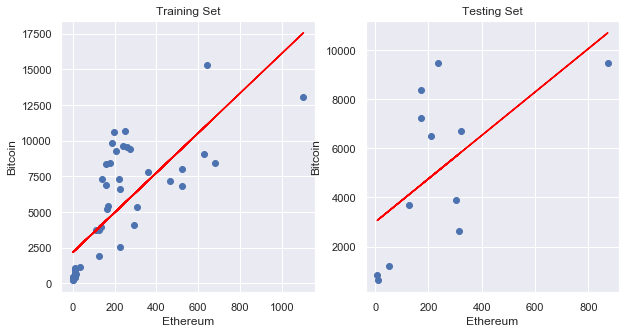

In [98]:
#split the data
ethereum_train, ethereum_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(coin_Ethereum_Update['Close'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state=15)
# Plot the data
fig, (ax3, ax4)= plt.subplots(1, 2, figsize= (10, 5))


# Plot the data
ax3.plot(ethereum_train, coin_Bitcoin_Update_train, 'o')
ax4.plot(ethereum_test, coin_Bitcoin_Update_test, 'o')

# Plot the regression line
m3, b3= np.polyfit(ethereum_train, coin_Bitcoin_Update_train, 1)
m4, b4= np.polyfit(ethereum_test, coin_Bitcoin_Update_test, 1)

#Calculate RMSEs.
M2_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, m3*(ethereum_train) + b3))
M2_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, m4*(ethereum_test) + b4))


# Plot the regression line
ax3.plot(ethereum_train, m3*(ethereum_train) + b3, color= 'red')
ax4.plot(ethereum_test, m4*(ethereum_test) + b4, color= 'red')

# Labeling the graph
ax3.set_xlabel('Ethereum')
ax3.set_ylabel('Bitcoin')
ax3.set_title('Training Set')
ax4.set_xlabel('Ethereum')
ax4.set_ylabel('Bitcoin')
ax4.set_title('Testing Set')

plt.show() # This lets you plot multiple inputs on the same graph

### Comparing Original and Training Set

In [99]:
# Comparision, Training Set Matches
mean_ethereum_data = coin_Ethereum_Update['Close'].mean()
mean_ethereum_train = ethereum_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Ethereum Data: ' + str(mean_ethereum_data))
print('Mean of Ethereum Train Data: ' + str(mean_ethereum_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Ethereum Data: 203.7693348235417
Mean of Ethereum Train Data: 196.36458018405213
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4903.192408915919


# MODEL 3: TSLA and BITCOIN (BTC = m*TSLA + b)

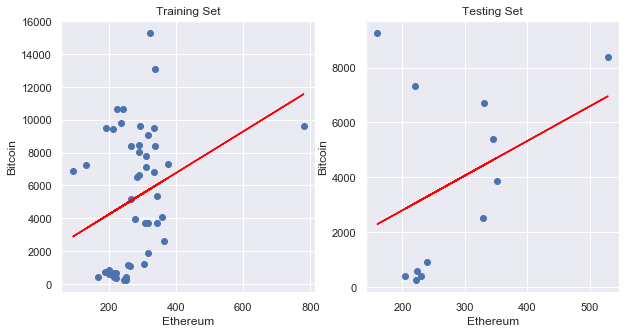

In [100]:
#split the data
tsla_train, tsla_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(tsla['Close'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 20)

# Plot the data
fig, (ax5, ax6)= plt.subplots(1, 2, figsize= (10, 5))


# Plot the data
ax5.plot(tsla_train, coin_Bitcoin_Update_train, 'o')
ax6.plot(tsla_test, coin_Bitcoin_Update_test, 'o')

# Plot the regression line
m5, b5= np.polyfit(tsla_train, coin_Bitcoin_Update_train, 1)
m6, b6= np.polyfit(tsla_test, coin_Bitcoin_Update_test, 1)


# Plot the regression line
ax5.plot(tsla_train, m5*(tsla_train) + b5, color= 'red')
ax6.plot(tsla_test, m6*(tsla_test) + b6, color= 'red')

#Calculate RMSEs.
M3_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, m5*(tsla_train) + b5))
M3_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test,  m6*(tsla_test) + b6))

# Labeling the graph
ax5.set_xlabel('Ethereum')
ax5.set_ylabel('Bitcoin')
ax5.set_title('Training Set')
ax6.set_xlabel('Ethereum')
ax6.set_ylabel('Bitcoin')
ax6.set_title('Testing Set')

plt.show() # This lets you plot multiple inputs on the same graph

### Comparing Original and Training Set

In [101]:
# Comparision, Training Set Matches
mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original TSLA Data: 278.8540786040484
Mean of TSLA Train Data: 278.07966267272894
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 5206.9415276486325


# MODEL 4: GOLD + TESLA and BITCOIN (BTC = w0 + w1 * GOLD + w2 * TSLA
Starting from M4, we are testing multivariate variable models, so there are no graphs.

In [102]:
#split the data
gold_train, gold_test, tsla_train, tsla_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                            tsla['Close'],
                                                                                            coin_Bitcoin_Update['Close'], 
                                                                                            test_size= 0.20, random_state=20) 
## Create A, the augmented data array
X1 = np.array(gold_train).reshape(-1, 1)
X2 = np.array(tsla_train).reshape(-1, 1)
Y = np.array(coin_Bitcoin_Update_train).reshape(-1, 1)    
w0_coeff = [1]*48

A4 = np.hstack((np.reshape(w0_coeff, (48,1)), X1, X2))

## Solve for w, the weighted vector
w4 = np.linalg.lstsq(A4, Y, rcond = None)[0]

## We get M4 = -1.668 + 1.419*GOLD + 1.072*TSLA
M4_predicted_Y_train = -1.668 + 1.419*gold_train + 1.072*tsla_train
M4_predicted_Y_test = -1.668 + 1.419*gold_test + 1.072*tsla_test

#Calculate RMSEs.
M4_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, M4_predicted_Y_train))
M4_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, M4_predicted_Y_test))

### Comparing Original and Training Set

In [103]:
# Comparision, Training Set Matches
mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))


Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1332.251583333333
Mean of Original TSLA Data: 278.8540786040484
Mean of TSLA Train Data: 278.07966267272894
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 5206.9415276486325


# MODEL 5: ETH + TSLA and BTC (BTC = w0 + w1 * ETH  + w2 * TSLA)

In [104]:
#split the data
eth_train, eth_test, tsla_train, tsla_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(coin_Ethereum_Update['Close'],
                                                                                            tsla['Close'],
                                                                                            coin_Bitcoin_Update['Close'], 
                                                                                            test_size= 0.20, random_state=19) 
## Create A, the augmented data array
X1 = np.array(eth_train).reshape(-1, 1)
X2 = np.array(tsla_train).reshape(-1, 1)
Y = np.array(coin_Bitcoin_Update_train).reshape(-1, 1)    
w0_coeff = [1]*48

A5 = np.hstack((np.reshape(w0_coeff, (48,1)), X1, X2))

## Solve for w, the weighted vector
w5 = np.linalg.lstsq(A5, Y, rcond = None)[0]

## We get M5 = 1728.082 + 12.035*ETH + 2.953*TSLA
M5_predicted_Y_train = 1728.082 + 12.035*eth_train + 2.953*tsla_train
M5_predicted_Y_test = 1728.082 + 12.035*eth_test + 2.953*tsla_test

#Calculate RMSEs.
M5_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, M5_predicted_Y_train))
M5_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, M5_predicted_Y_test))

### Comparing Original and Training Set

In [105]:
# Comparision, Training Set Matches
mean_eth_data = coin_Ethereum_Update['Close'].mean()
mean_eth_train = eth_train.mean()

mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original ETH Data: ' + str(mean_eth_data))
print('Mean of ETH Train Data: ' + str(mean_eth_train))
print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))


Mean of Original ETH Data: 203.7693348235417
Mean of ETH Train Data: 200.24840632376268
Mean of Original TSLA Data: 278.8540786040484
Mean of TSLA Train Data: 283.62285860286823
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4878.241012514055


# MODEL 6: GOLD + ETH and BTC (BTC = w0 + w1 * GOLD  + w2 * ETH)

In [106]:
#split the data
gold_train, gold_test, eth_train, eth_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                            coin_Ethereum_Update['Close'],
                                                                                            coin_Bitcoin_Update['Close'], 
                                                                                            test_size= 0.20, random_state=19) 
## Create A, the augmented data array
X1 = np.array(gold_train).reshape(-1, 1)
X2 = np.array(eth_train).reshape(-1, 1)
Y = np.array(coin_Bitcoin_Update_train).reshape(-1, 1)    
w0_coeff = [1]*48

A6 = np.hstack((np.reshape(w0_coeff, (48,1)), X1, X2))

## Solve for w, the weighted vector
w6 = np.linalg.lstsq(A6, Y, rcond = None)[0]
w6

## We get M6 = -1.493 + 1.334*GOLD + 1.104*ETH
M6_predicted_Y_train = -1.493 + 1.334*gold_train + 1.104*eth_train
M6_predicted_Y_test =  -1.493 + 1.334*gold_test + 1.104*eth_test

#Calculate RMSEs.
M6_rmse_train = np.sqrt(mean_squared_error(coin_Bitcoin_Update_train, M6_predicted_Y_train))
M6_rmse_test = np.sqrt(mean_squared_error(coin_Bitcoin_Update_test, M6_predicted_Y_test))

### Comparing Original and Training Set

In [107]:
# Comparision, Training Set Matches
mean_eth_data = coin_Ethereum_Update['Close'].mean()
mean_eth_train = eth_train.mean()

mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original ETH Data: ' + str(mean_eth_data))
print('Mean of ETH Train Data: ' + str(mean_eth_train))
print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))


Mean of Original ETH Data: 203.7693348235417
Mean of ETH Train Data: 200.24840632376268
Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1318.6616666666666
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4878.241012514055


# Calculate the RMSEs of every model. 

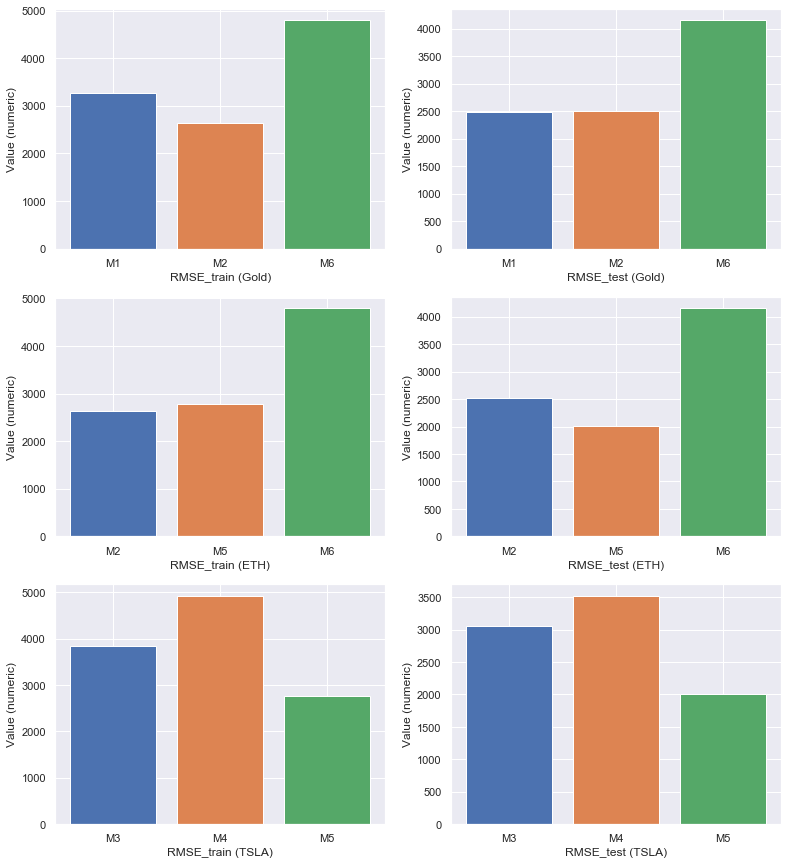

In [111]:
RMSE_gold_train = [M1_rmse_train, M2_rmse_train, M6_rmse_train]
RMSE_gold_test = [M1_rmse_test, M2_rmse_test, M6_rmse_test]

RMSE_eth_train = [M2_rmse_train, M5_rmse_train, M6_rmse_train]
RMSE_eth_test = [M2_rmse_test, M5_rmse_test, M6_rmse_test]

RMSE_tsla_train = [M3_rmse_train, M4_rmse_train, M5_rmse_train,]
RMSE_tsla_test = [M3_rmse_test, M4_rmse_test, M5_rmse_test]

fig, axs = plt.subplots(3, 2, figsize= (13,15))

#GOLD
for i in range(0,3):
    r = ['1','2','6']
    s = 'M' + r[i]
    axs[0,0].bar(s, RMSE_gold_train[i])
    axs[0,0].set_xlabel('RMSE_train (Gold)')
    axs[0,0].set_ylabel('Value (numeric)')

for i in range(0,3):
    r = ['1','2','6']
    s = 'M' + r[i]
    axs[0,1].bar(s, RMSE_gold_test[i])
    axs[0,1].set_xlabel('RMSE_test (Gold)')
    axs[0,1].set_ylabel('Value (numeric)')

#ETH
for i in range(0,3):
    r = ['2','5','6']
    s = 'M' + r[i]
    axs[1,0].bar(s, RMSE_eth_train[i])
    axs[1,0].set_xlabel('RMSE_train (ETH)')
    axs[1,0].set_ylabel('Value (numeric)')

for i in range(0,3):
    r = ['2','5','6']
    s = 'M' + r[i]
    axs[1,1].bar(s, RMSE_eth_test[i])
    axs[1,1].set_xlabel('RMSE_test (ETH)')
    axs[1,1].set_ylabel('Value (numeric)')


#TSLA
for i in range(0,3):
    r = ['3','4','5']
    s = 'M' + r[i]
    axs[2,0].bar(s, RMSE_tsla_train[i])
    axs[2,0].set_xlabel('RMSE_train (TSLA)')
    axs[2,0].set_ylabel('Value (numeric)')

                        
for i in range(0,3):
    r = ['3','4','5']
    s = 'M' + r[i]
    axs[2,1].bar(s, RMSE_tsla_test[i])
    axs[2,1].set_xlabel('RMSE_test (TSLA)')
    axs[2,1].set_ylabel('Value (numeric)')


## New Stuff

### Descriptive Statistics of the Data 

From the tutorial this github account

https://github.com/kirenz/linear-regression/blob/master/python-regression-tutorial.ipynb

Measures of Dispersion

In [61]:
# I am wondering if there might be more correlation found between Ethereum and Bitcoin if we instead look at the percent
# change in the price from month to month. Here I just calculated the percent change and appended it to a list

percent_Bitcoin = []
for i in range(59):
    percent_Bitcoin.append(((coin_Bitcoin_Update['Close'][i+1] - coin_Bitcoin_Update['Close'][i]) / coin_Bitcoin_Update['Close'][i])*100)
percent_Bitcoin[len(percent_Bitcoin):] = [0]

percent_Ethereum = []
for i in range(59):
    percent_Ethereum.append(((coin_Ethereum_Update['Close'][i+1] - coin_Ethereum_Update['Close'][i]) / coin_Ethereum_Update['Close'][i])*100)

percent_Ethereum[len(percent_Ethereum):] = [0]


coin_Bitcoin_Update['Percent_Change'] = percent_Bitcoin
coin_Ethereum_Update['Percent_Change'] = percent_Ethereum


In [62]:
coin_Bitcoin_Update.head()

,Date,Close,Percent_Change
0,2015-08-31,241.751832,-3.373831
1,2015-09-30,233.595533,13.382029
2,2015-10-31,264.855356,31.725987
3,2015-11-30,348.883332,21.663751
4,2015-12-31,424.464547,-3.208763


In [63]:
# summary statistics for all numerical columns
round(coin_Bitcoin_Update.describe(),2)

,Close,Percent_Change
count,60.00,60.00
mean,4933.25,8.36
std,3971.66,22.25
min,233.60,-31.21
25%,710.10,-3.25
50%,4621.65,4.63
75%,8377.50,14.89
max,15294.27,95.75


In [64]:
coin_Ethereum_Update.head()

,Date,Close,Percent_Change
0,2015-08-31,1.259649,-21.488746
1,2015-09-30,0.988966,-33.152008
2,2015-10-31,0.661104,40.878313
3,2015-11-30,0.931352,-4.841650
4,2015-12-31,0.886259,68.652269


In [ ]:
# summary statistics for all numerical columns
round(coin_Ethereum_Update.describe(),2)

In [6]:
# quantiles
coin_Bitcoin_Update['Percent_Change'].quantile([.25, .5, .75])

NameError: name 'coin_Bitcoin_Update' is not defined

In [7]:
# quantiles
coin_Ethereum_Update['Percent_Change'].quantile([.25, .5, .75])

NameError: name 'coin_Ethereum_Update' is not defined

In [8]:
# Range
coin_Bitcoin_Update['Percent_Change'].max() - coin_Bitcoin_Update['Percent_Change'].min()

NameError: name 'coin_Bitcoin_Update' is not defined

In [9]:
coin_Bitcoin_Update['Percent_Change'].max()

NameError: name 'coin_Bitcoin_Update' is not defined

In [47]:
coin_Bitcoin_Update['Percent_Change'].min()

-31.211764692085715

In [48]:
#Distibution of Variables
# histogram with seaborn
sns.distplot(Bitcoin_Ethereum.Bitcoin_Percent_Change);

NameError: name 'Bitcoin_Ethereum' is not defined

In [49]:
Bitcoin_Ethereum.hist(bins=5, figsize=(10,5));

NameError: name 'Bitcoin_Ethereum' is not defined

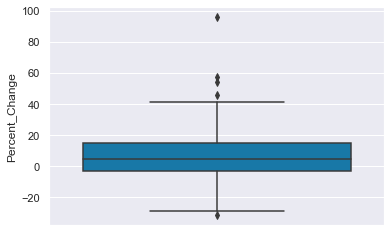

In [50]:
# boxplot 
sns.boxplot(y='Percent_Change', data=coin_Bitcoin_Update, palette='winter');

In [51]:
coin_Ethereum_Update= coin_Ethereum_Update.rename(columns={"Date": "Date","Close": "Ethereum_Close", "Percent_Change": "Ethereum_Percent_Change"}, errors="raise")
coin_Bitcoin_Update= coin_Bitcoin_Update.rename(columns={"Date": "Date","Close": "Bitcoin_Close", "Percent_Change": "Bitcoin_Percent_Change"}, errors="raise")

In [52]:
coin_Bitcoin_Update.head()

,Date,Bitcoin_Close,Bitcoin_Percent_Change
0,2015-08-31,241.751832,-3.373831
1,2015-09-30,233.595533,13.382029
2,2015-10-31,264.855356,31.725987
3,2015-11-30,348.883332,21.663751
4,2015-12-31,424.464547,-3.208763


In [53]:

coin_Ethereum_Update = coin_Ethereum_Update.drop(['Date'], axis=1)
Bitcoin_Ethereum = pd.concat([coin_Bitcoin_Update, coin_Ethereum_Update], axis=1)
Bitcoin_Ethereum.head()

,Date,Bitcoin_Close,Bitcoin_Percent_Change,Ethereum_Close,Ethereum_Percent_Change
0,2015-08-31,241.751832,-3.373831,1.259649,-21.488746
1,2015-09-30,233.595533,13.382029,0.988966,-33.152008
2,2015-10-31,264.855356,31.725987,0.661104,40.878313
3,2015-11-30,348.883332,21.663751,0.931352,-4.841650
4,2015-12-31,424.464547,-3.208763,0.886259,68.652269


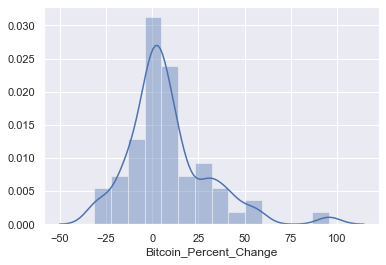

In [54]:
#Distibution of Variables
# histogram with seaborn
sns.distplot(Bitcoin_Ethereum.Bitcoin_Percent_Change);

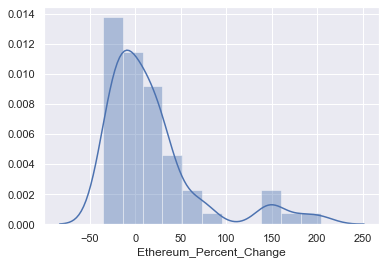

In [55]:
#Distibution of Variables
# histogram with seaborn
sns.distplot(Bitcoin_Ethereum.Ethereum_Percent_Change);

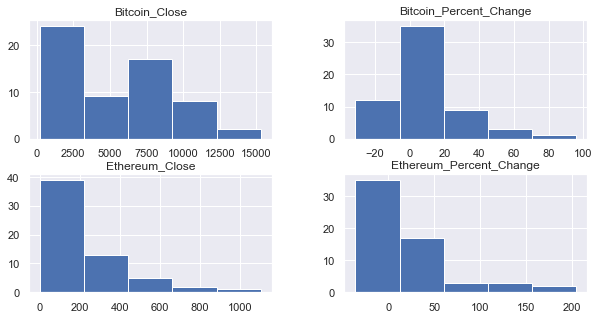

In [56]:
Bitcoin_Ethereum.hist(bins=5, figsize=(10,5));

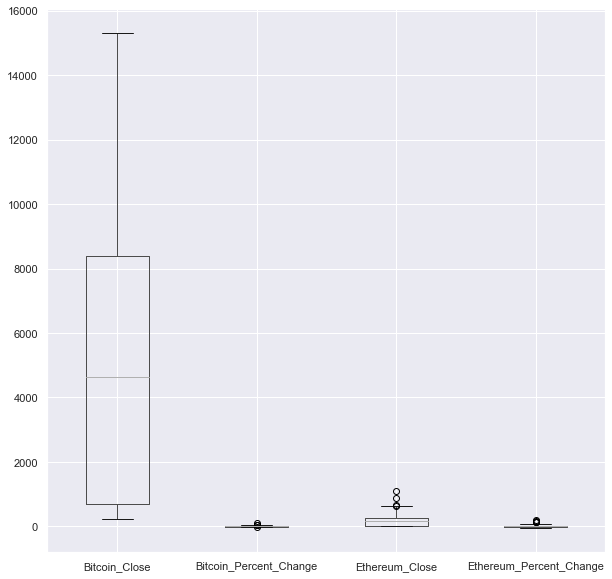

In [57]:
Bitcoin_Ethereum.boxplot(figsize=(10,10));

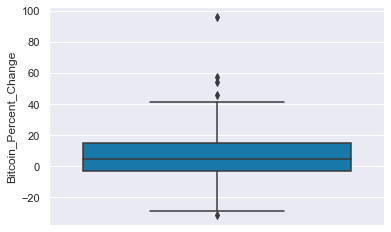

In [58]:
# boxplot 
sns.boxplot(y='Bitcoin_Percent_Change', data=Bitcoin_Ethereum, palette='winter');

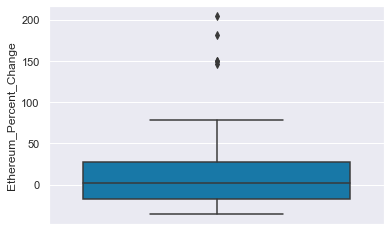

In [59]:
# boxplot 
sns.boxplot(y='Ethereum_Percent_Change', data=Bitcoin_Ethereum, palette='winter');

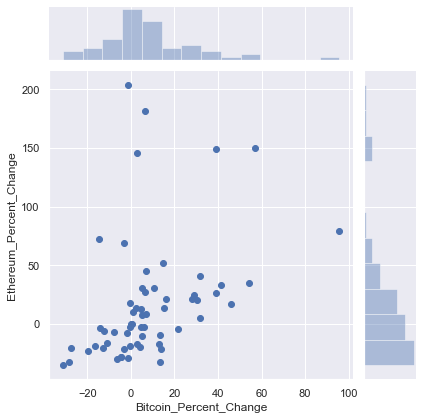

In [60]:

# check relationship with a joint plot
sns.jointplot(x="Bitcoin_Percent_Change", y="Ethereum_Percent_Change", data=Bitcoin_Ethereum, stat_func=None);

In [61]:
# calculate the mean 
sum_x_i = Bitcoin_Ethereum.Bitcoin_Percent_Change.sum() 
n = len(Bitcoin_Ethereum["Bitcoin_Percent_Change"])
# formula for mean
x_bar = sum_x_i / n
print(x_bar)

8.362566795970817


In [62]:
bitcoin_mean = Bitcoin_Ethereum['Bitcoin_Percent_Change'].mean()
ethereum_mean = Bitcoin_Ethereum['Bitcoin_Percent_Change'].mean()

In [63]:
# add the mean (as "average") to our DataFrame
Bitcoin_Ethereum = Bitcoin_Ethereum.assign(Bitcoin_Average = Bitcoin_Ethereum.Bitcoin_Percent_Change.mean())
Bitcoin_Ethereum = Bitcoin_Ethereum.assign(Ethereum_Average = Bitcoin_Ethereum.Ethereum_Percent_Change.mean())
Bitcoin_Ethereum.head()

,Date,Bitcoin_Close,Bitcoin_Percent_Change,Ethereum_Close,Ethereum_Percent_Change,Bitcoin_Average,Ethereum_Average
0,2015-08-31,241.751832,-3.373831,1.259649,-21.488746,8.362567,17.735891
1,2015-09-30,233.595533,13.382029,0.988966,-33.152008,8.362567,17.735891
2,2015-10-31,264.855356,31.725987,0.661104,40.878313,8.362567,17.735891
3,2015-11-30,348.883332,21.663751,0.931352,-4.841650,8.362567,17.735891
4,2015-12-31,424.464547,-3.208763,0.886259,68.652269,8.362567,17.735891


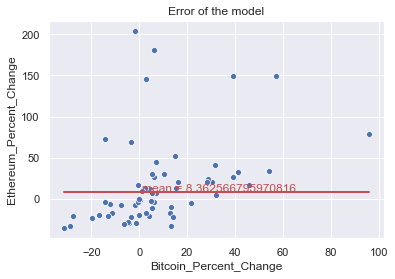

In [64]:
# create a scatterplot (plt)
btc_max = Bitcoin_Ethereum["Bitcoin_Percent_Change"].max()
btc_min = Bitcoin_Ethereum["Bitcoin_Percent_Change"].min()
plt = sns.scatterplot(x="Bitcoin_Percent_Change", y="Ethereum_Percent_Change",data=Bitcoin_Ethereum);
plt.set(xlabel='Bitcoin_Percent_Change', ylabel='Ethereum_Percent_Change', title='Error of the model');
plt.plot([btc_min, btc_max], [bitcoin_mean, bitcoin_mean], linewidth=2, color='r');
num = bitcoin_mean + 1
plt.text(1, num,'mean = ' + str(bitcoin_mean), rotation=0, color='r');

### Linear Regression

In [65]:
# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm = smf.ols(formula ='Bitcoin_Percent_Change ~ Ethereum_Percent_Change', data=Bitcoin_Ethereum).fit()

# add the regression predictions (as "pred") to our DataFrame
Bitcoin_Ethereum['Prediction'] = lm.predict()

In [66]:
Bitcoin_Ethereum

,Date,Bitcoin_Close,Bitcoin_Percent_Change,Ethereum_Close,Ethereum_Percent_Change,Bitcoin_Average,Ethereum_Average,Prediction
0,2015-08-31,241.751832,-3.373831,1.259649,-21.488746,8.362567,17.735891,1.910664
1,2015-09-30,233.595533,13.382029,0.988966,-33.152008,8.362567,17.735891,-0.007779
2,2015-10-31,264.855356,31.725987,0.661104,40.878313,8.362567,17.735891,12.169171
3,2015-11-30,348.883332,21.663751,0.931352,-4.841650,8.362567,17.735891,4.648878
4,2015-12-31,424.464547,-3.208763,0.886259,68.652269,8.362567,17.735891,16.737597
5,2016-01-31,410.844485,-1.566581,1.494696,204.135973,8.362567,17.735891,39.022766
6,2016-02-29,404.408274,2.996353,4.545909,145.820987,8.362567,17.735891,29.430768
7,2016-03-31,416.525774,4.276716,11.174799,-19.966232,8.362567,17.735891,2.161096
8,2016-04-30,434.339398,6.357935,8.943613,27.072089,8.362567,17.735891,9.898240
9,2016-05-31,461.954415,39.162879,11.364836,26.209011,8.362567,17.735891,9.756276


In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Bitcoin_Percent_Change   R-squared:                       0.153
Model:                                OLS   Adj. R-squared:                  0.138
Method:                     Least Squares   F-statistic:                     10.44
Date:                    Mon, 15 Mar 2021   Prob (F-statistic):            0.00203
Time:                            17:41:28   Log-Likelihood:                -265.80
No. Observations:                      60   AIC:                             535.6
Df Residuals:                          58   BIC:                             539.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.4453      2.815      1.934      0.058      -0.190      11.081
Ethereum_Percent_Change     0.1645      0.051      3.232      0.002       0.063       0.266
==============================================================================
Omnibus:                       14.772   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.028
Skew:                           0.918   Prob(JB):                     4.48e-05
Kurtosis:                       5.155   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
Bitcoin_Ethereum['Prediction'].describe()

count    60.000000
mean      8.362567
std       8.690357
min      -0.397660
25%       2.493847
50%       5.815662
75%      10.022861
max      39.022766
Name: Prediction, dtype: float64

In [69]:
# This is just a reminder of how the regression works.
# We make a prediction for X using the mean, min and max numbers from the stats in Bitcoin_Ethereum
b_0 = 5.4453
b_1 = 0.1645
X = 30
Vorhersage = b_0 + b_1*(X)
print(Vorhersage)

10.3803


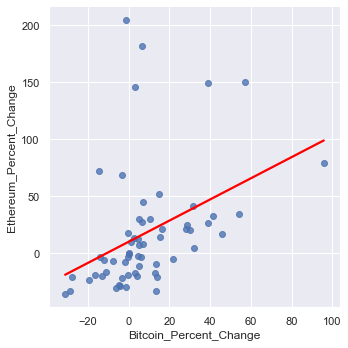

In [70]:
# Plot regression line 
sns.lmplot(x='Bitcoin_Percent_Change', y='Ethereum_Percent_Change', data=Bitcoin_Ethereum, line_kws={'color':'red'}, height=5, ci=None, );

In [71]:
# Regression results overview
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Bitcoin_Percent_Change   R-squared:                       0.153
Model:                                OLS   Adj. R-squared:                  0.138
Method:                     Least Squares   F-statistic:                     10.44
Date:                    Mon, 15 Mar 2021   Prob (F-statistic):            0.00203
Time:                            17:41:31   Log-Likelihood:                -265.80
No. Observations:                      60   AIC:                             535.6
Df Residuals:                          58   BIC:                             539.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.4453      2.815      1.934      0.058      -0.190      11.081
Ethereum_Percent_Change     0.1645      0.051      3.232      0.002       0.063       0.266
==============================================================================
Omnibus:                       14.772   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.028
Skew:                           0.918   Prob(JB):                     4.48e-05
Kurtosis:                       5.155   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The conidtion no 

### Measuring the quality of fit: errors

In [72]:
Bitcoin_Ethereum = Bitcoin_Ethereum.assign(Error = (Bitcoin_Ethereum['Bitcoin_Percent_Change'] - Bitcoin_Ethereum['Bitcoin_Average']))
Bitcoin_Ethereum.head(5)

,Date,Bitcoin_Close,Bitcoin_Percent_Change,Ethereum_Close,Ethereum_Percent_Change,Bitcoin_Average,Ethereum_Average,Prediction,Error
0,2015-08-31,241.751832,-3.373831,1.259649,-21.488746,8.362567,17.735891,1.910664,-11.736398
1,2015-09-30,233.595533,13.382029,0.988966,-33.152008,8.362567,17.735891,-0.007779,5.019462
2,2015-10-31,264.855356,31.725987,0.661104,40.878313,8.362567,17.735891,12.169171,23.363421
3,2015-11-30,348.883332,21.663751,0.931352,-4.841650,8.362567,17.735891,4.648878,13.301184
4,2015-12-31,424.464547,-3.208763,0.886259,68.652269,8.362567,17.735891,16.737597,-11.571330


In [73]:
# calculate the sum of the errors 
Bitcoin_Ethereum.Error.sum()

9.769962616701378e-14

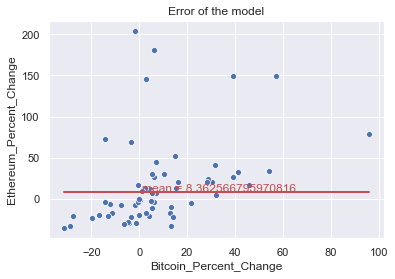

In [74]:
# create a scatterplot (plt)
btc_max = Bitcoin_Ethereum["Bitcoin_Percent_Change"].max()
btc_min = Bitcoin_Ethereum["Bitcoin_Percent_Change"].min()
plt = sns.scatterplot(x="Bitcoin_Percent_Change", y="Ethereum_Percent_Change",data=Bitcoin_Ethereum);
plt.set(xlabel='Bitcoin_Percent_Change', ylabel='Ethereum_Percent_Change', title='Error of the model');
plt.plot([btc_min, btc_max], [bitcoin_mean, bitcoin_mean], linewidth=2, color='r');
num = bitcoin_mean + 1
plt.text(1, num,'mean = ' + str(bitcoin_mean), rotation=0, color='r');

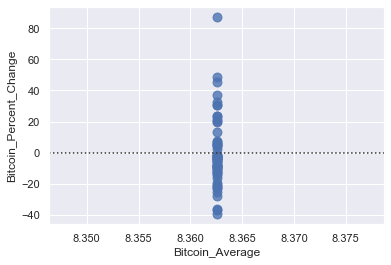

In [75]:
# residual plot
sns.residplot(x="Bitcoin_Average", y="Bitcoin_Percent_Change", data=Bitcoin_Ethereum, scatter_kws={"s": 80});

In [76]:
# calculate squared error and assign it to dataframe
Bitcoin_Ethereum = Bitcoin_Ethereum.assign(Error_Sq = (Bitcoin_Ethereum['Bitcoin_Percent_Change'] - Bitcoin_Ethereum['Bitcoin_Average'])**2)
Bitcoin_Ethereum.head(5)

,Date,Bitcoin_Close,Bitcoin_Percent_Change,Ethereum_Close,Ethereum_Percent_Change,Bitcoin_Average,Ethereum_Average,Prediction,Error,Error_Sq
0,2015-08-31,241.751832,-3.373831,1.259649,-21.488746,8.362567,17.735891,1.910664,-11.736398,137.743041
1,2015-09-30,233.595533,13.382029,0.988966,-33.152008,8.362567,17.735891,-0.007779,5.019462,25.195002
2,2015-10-31,264.855356,31.725987,0.661104,40.878313,8.362567,17.735891,12.169171,23.363421,545.849423
3,2015-11-30,348.883332,21.663751,0.931352,-4.841650,8.362567,17.735891,4.648878,13.301184,176.921492
4,2015-12-31,424.464547,-3.208763,0.886259,68.652269,8.362567,17.735891,16.737597,-11.571330,133.895677


In [77]:
# calculate sum of squared error (which is in case of the mean the total error)
SS_T = Bitcoin_Ethereum.Error_Sq.sum()
# print output
print('Sum of squared error (SS_T) of model 1:', SS_T)

Sum of squared error (SS_T) of model 1: 29201.9233451761


### Model 2: Linear Regression

In [78]:
lm.resid.sum()

3.552713678800501e-15

In [79]:
# obtain the residuals from statsmodel (resid)
Bitcoin_Ethereum['error_2'] = lm.resid
# square the residuals 
Bitcoin_Ethereum['error_sq_2'] = Bitcoin_Ethereum['error_2']**2
# show df
Bitcoin_Ethereum.head(5)

,Date,Bitcoin_Close,Bitcoin_Percent_Change,Ethereum_Close,Ethereum_Percent_Change,Bitcoin_Average,Ethereum_Average,Prediction,Error,Error_Sq,error_2,error_sq_2
0,2015-08-31,241.751832,-3.373831,1.259649,-21.488746,8.362567,17.735891,1.910664,-11.736398,137.743041,-5.284496,27.925893
1,2015-09-30,233.595533,13.382029,0.988966,-33.152008,8.362567,17.735891,-0.007779,5.019462,25.195002,13.389808,179.286957
2,2015-10-31,264.855356,31.725987,0.661104,40.878313,8.362567,17.735891,12.169171,23.363421,545.849423,19.556817,382.469086
3,2015-11-30,348.883332,21.663751,0.931352,-4.841650,8.362567,17.735891,4.648878,13.301184,176.921492,17.014873,289.505890
4,2015-12-31,424.464547,-3.208763,0.886259,68.652269,8.362567,17.735891,16.737597,-11.571330,133.895677,-19.946360,397.857275


In [80]:
print(SS_T)

29201.9233451761


In [81]:
# Sum of squared residuals (SS_R)
SS_R = Bitcoin_Ethereum['error_sq_2'].sum()
print(SS_R)
# SS_R – Sum of squared (whitened) residuals from statsmodel function
lm.ssr

24746.107638165973


24746.107638165973

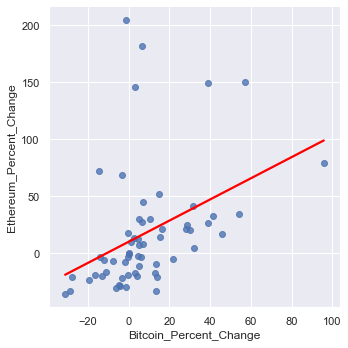

In [82]:
# Plot regression line 
sns.lmplot(x='Bitcoin_Percent_Change', y='Ethereum_Percent_Change', data=Bitcoin_Ethereum, line_kws={'color':'red'}, height=5, ci=None);

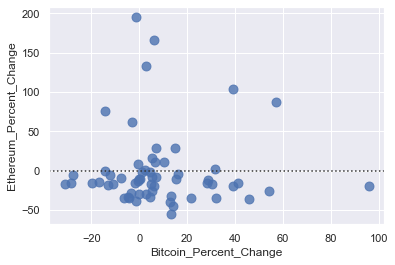

In [83]:
sns.residplot(x="Bitcoin_Percent_Change", y="Ethereum_Percent_Change", data=Bitcoin_Ethereum, scatter_kws={"s": 80});

In [84]:
# Explained sum of squares  (SS_M = SS_T - SS_R)
SS_M = SS_T - SS_R
print(SS_M)
# Explained sum of squres (SS_M) from statsmodel function
lm.ess

4455.815707010126


4455.815707010126

In [85]:
# R_Squared: explained sum of squared residuals
R_squared = SS_M / SS_T
print(R_squared)

0.1525863777649491


In [86]:
# R_Squared of statsmodel
lm.rsquared

0.1525863777649491

In [87]:
# Adjusted R_Squared: 
lm.rsquared_adj

0.13797579807124138

### Pearson's Correlation Coefficient

In [88]:
# correlation coefficient r
r = np.sqrt(R_squared)
print(r)

0.39062306353433496


In [89]:
# correlation coefficient with p-value
stats.pearsonr(Bitcoin_Ethereum['Bitcoin_Percent_Change'], Bitcoin_Ethereum['Ethereum_Percent_Change'])

(0.39062306353433507, 0.002030710583851909)

### Mean squared error, variance and standard deviation

In [90]:
# calculate mean squared error of the model 1 "the mean"
# Number of obeservations (lenght of DataFrame)
n = len(Bitcoin_Ethereum["Bitcoin_Percent_Change"])
# calculate mse
mse = (SS_T/(n-1))
# print output
print('Mean squared error of the mean:', mse)

Mean squared error of the mean: 494.94785330806945


In [91]:
# generate a variable called variance (to illustrate relationship between variance and standard deviation)
variance = mse
# obtain the standard deviation
print(f'Standard deviation (SD) of model 1 = {round(np.sqrt(variance),2)}')

Standard deviation (SD) of model 1 = 22.25


In [92]:
# Total MSE_T (this is the MSE of the basline mean model) from statsmodel
MSE_T = lm.mse_total
# print output
print('Total mean squared error (MSE_T):', MSE_T)
# compare this result to mse... they are the same

Total mean squared error (MSE_T): 494.94785330806945


In [93]:
# Mean squared error of residuals (MSE_R)
MSE_R = SS_R / (20-2)
print('Mean squared error of residuals (MSE_R):', MSE_R)
# MSE of residuals from statsmodel (preferred)
print(f'Mean squared error od residuals (MSE_R): {lm.mse_resid}')

Mean squared error of residuals (MSE_R): 1374.7837576758875
Mean squared error od residuals (MSE_R): 426.6570282442409


In [94]:
# the standard deviation equals the root of the MSE_R
print(f'Standard deviation (SD) of model 2 = {round(np.sqrt(MSE_R),2)}')

Standard deviation (SD) of model 2 = 37.08


### F-Statistic

In [95]:
# Mean squared error of the model (MSE_M)
p = 1 # we only have one predictor (height_parents)
MS_M = (SS_M / p)
print('MS_M =', MS_M)
# MSE_M of residuals from statsmodel
print(f'MS_M = {lm.mse_model}')

MS_M = 4455.815707010126
MS_M = 4455.815707010126


In [96]:
MS_R = MSE_R
# F-value
F_value = (MS_M / MS_R)
print(F_value)

3.2411029604705353


In [97]:
# statsmodel
# Alternative way to obtain F-value (preferred)
print(lm.fvalue)
# which of course equals
F_val = (lm.mse_model / lm.mse_resid)
print(F_val)

10.443553983738393
10.443553983738393


### Standard Error

In [98]:
# calculate standard error (...we ignore the fact that our sample is small since n < 30) 
se = Bitcoin_Ethereum['Bitcoin_Percent_Change'].sem()
print(se)
# assign se to df
Bitcoin_Ethereum = Bitcoin_Ethereum.assign(se=se)

2.872130026385961


In [99]:
# alternative way to calculate standard error (se)
# calculate standard deviation (s)
s = Bitcoin_Ethereum['Bitcoin_Percent_Change'].std()
# calculate se
se = (s/np.sqrt(n))
print(se)

2.872130026385961


In [100]:
# Get standard error of parameters
se_2 = lm.bse
print('Standard error (SE) od model 2:', se_2)

Standard error (SE) od model 2: Intercept                  2.815292
Ethereum_Percent_Change    0.050898
dtype: float64


### Confidence interval

In [101]:
# calculate z-scores
z = stats.zscore(Bitcoin_Ethereum.Bitcoin_Percent_Change)
print(z)
# assign z-scores to df
Bitcoin_Ethereum = Bitcoin_Ethereum.assign(z = z)

[-0.53199155  0.22752394  1.05902527  0.6029207  -0.52450928 -0.45007187
 -0.2432416  -0.18520487 -0.09086665  1.39612727 -0.24871022 -0.93950678
 -0.17365959 -0.09698047  0.20412546  0.25567521  0.09639073  0.3522907
 -0.09395376 -0.06890628  2.20825012  1.39262147 -0.57986955  2.0706228
 -0.1643365   1.06529883  1.69541133  3.96116469 -1.03366795 -1.63079679
 -0.58552929 -0.88394013 -0.14354911 -1.26808403 -0.14363422 -0.66209275
 -0.43958028 -0.4651533  -1.1345446  -1.79383909 -0.39848931 -0.36638416
 -0.05647734  0.99171014  1.48644925  0.92702397  0.22434552 -0.39014468
 -0.73219966 -1.02666874 -0.39973015 -0.96886849  0.30873936  0.29171162
 -1.67795583 -0.14588165  0.90005887 -0.26843356 -0.33097184 -0.37906134]


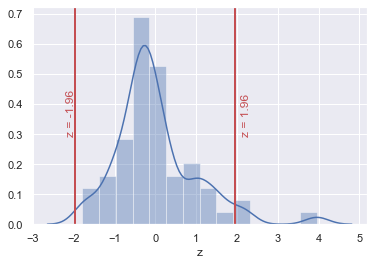

In [102]:
plt = sns.distplot(Bitcoin_Ethereum.z);
# draw a vertical line
plt.axvline(1.96, 0, 1, linewidth=2, color='r');
# add text
plt.text(2.1, 0.3,'z = 1.96', rotation=90, color='r');
plt.axvline(-1.96, 0, 1, linewidth=2, color='r');
plt.text(-2.2, 0.3,'z = -1.96', rotation=90, color='r');

In [103]:
# lower boundary
lb = (Bitcoin_Ethereum.Bitcoin_Percent_Change.mean() - (1.96*se))
# upper boundary
up = (Bitcoin_Ethereum.Bitcoin_Percent_Change.mean() + (1.96*se))
print('Lower boundary of CI', lb)
print('Upper boundary of CI', up)

Lower boundary of CI 2.733191944254332
Upper boundary of CI 13.991941647687298


In [104]:
up_1 = round(up)
up_1

14

In [105]:
mean = Bitcoin_Ethereum['Bitcoin_Average'][0]


Text(13.991941647687298, 0.005, 'Upper Bound')

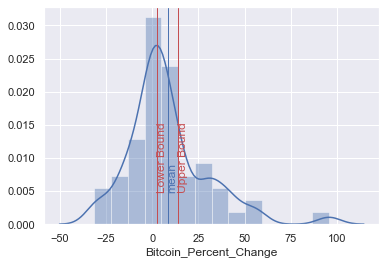

In [149]:
# draw limits of confidence intervall
plt = sns.distplot(Bitcoin_Ethereum.Bitcoin_Percent_Change);
# draw a vertical line to mark the mean 
plt.axvline(mean, 0, 1, linewidth=1, color='b');
# add text
plt.text(x = mean, y = .005, s= "mean", rotation = 90,color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(lb, 0, 1, linewidth=1, color='r');
# add text
lowers= 'Lower limit = ' + str(lb)
highers = ''
num_lb = lb

plt.text(x = num_lb, y = .005, s= "Lower Bound",rotation = 90,color = 'r')
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(up, 0, 1, linewidth=1, color='r');
plt.text(x = up, y = .005, s= "Upper Bound",rotation = 90,color = 'r')

In [150]:
# Obtain confidence interval for fitted parameters 
lm.conf_int(alpha=0.05)

,0,1
Intercept,-0.190159,11.080682
Ethereum_Percent_Change,0.062602,0.266370


In [153]:
Bitcoin_Ethereum['Ethereum_Percent_Change'].describe()

count     60.000000
mean      17.735891
std       52.833421
min      -35.522310
25%      -17.943259
50%        2.251865
75%       27.829729
max      204.135973
Name: Ethereum_Percent_Change, dtype: float64

In [156]:
# Make a prediction for height when parents average height is 168 cm
to_predict = pd.DataFrame({'Ethereum_Percent_Change':[12]})
results = lm.get_prediction(to_predict)
round(results.summary_frame(alpha=0.05),2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.42,2.68,2.05,12.79,-34.27,49.11


C:\Users\17606\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


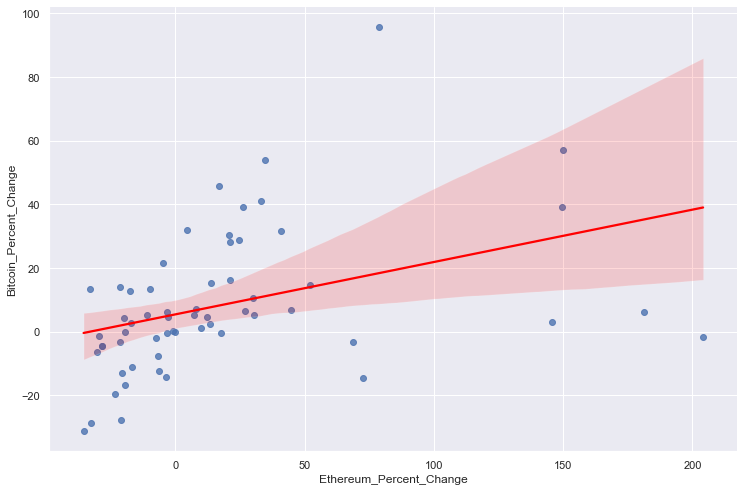

In [157]:
# Plot regression line with CI 95%
sns.lmplot(x='Ethereum_Percent_Change', y='Bitcoin_Percent_Change', data=Bitcoin_Ethereum, order=1, line_kws={'color':'red'}, size=7, aspect=1.5, ci=95);

### Confidence intervals in small samples

In [158]:
# calculate t-statistic
# 95% confidence interval, two tailed test, 
# p<0.05 (we need to take 0.025 at each side), n=20, df=19
t = stats.t.ppf(1-0.025, 19)
print(t)
# lower boundary
lb_t = (Bitcoin_Ethereum.Bitcoin_Percent_Change.mean() - (t*se))
# upper boundary
up_t = (Bitcoin_Ethereum.Bitcoin_Percent_Change.mean() + (t*se))
print('Lower boundary of CI (t-statistics)', lb_t)
print('Upper boundary of CI (t-statistics)', up_t)

2.093024054408263
Lower boundary of CI (t-statistics) 2.3511295633567606
Upper boundary of CI (t-statistics) 14.37400402858487
